##Abbreviations:

battery_power: Total energy a battery can store in one time measured in mAh
blue: Has bluetooth or not
clock_speed: speed at which microprocessor executes instructions
dual_sim: Has dual sim support or not
fc: Front Camera mega pixels
four_g: Has 4G or not
int_memory: Internal Memory in Gigabytes
m_dep: Mobile Depth in cm
mobile_wt: Weight of mobile phone
n_cores: Number of cores of processor
pc: Primary Camera mega pixels
px_height: Pixel Resolution Height
px_width: Pixel Resolution Width
ram: Random Access Memory in Mega Bytes
sc_h: Screen Height of mobile in cm
sc_w: Screen Width of mobile in cm
talk_time: longest time that a single battery charge will last when you are talking
three_g: Has 3G or not
touch_screen: Has touch screen or not
wifi: Has wifi or not
price_range: This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# To filter/truncate warnings
import warnings
warnings.filterwarnings('ignore')
#To see maximum no of columns
pd.set_option('display.max_columns',None)
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [2]:
#Load the dataset
df_train = pd.read_csv('MobileTrain.csv')
df_test = pd.read_csv('MobileTest.csv')

In [8]:
#Display first 5 columns
df_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [9]:
df_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [4]:
#Get the dimensions of dataset
df_train.shape

(2000, 21)

In [5]:
df_test.shape

(1000, 21)

In [6]:
#Basic information about the dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
# Statistical information about the dataset
df_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [8]:
# Checking null value
df_train.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [6]:
#Check duplicated data
df_train.duplicated().sum()

0

In [9]:
#Number of unique values
df_train.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [3]:
#Unique values inside each columns
for x in df_train:
    print('Unique values in',x, 'are :')
    print(df_train[x].value_counts())
    print('-'*50)

Unique values in battery_power are :
1872    6
618     6
1589    6
1715    5
1807    5
       ..
660     1
1452    1
1005    1
1372    1
858     1
Name: battery_power, Length: 1094, dtype: int64
--------------------------------------------------
Unique values in blue are :
0    1010
1     990
Name: blue, dtype: int64
--------------------------------------------------
Unique values in clock_speed are :
0.5    413
2.8     85
2.3     78
2.1     76
1.6     76
2.5     74
0.6     74
1.4     70
1.3     68
1.5     67
2.0     67
1.9     65
0.7     64
2.9     62
1.8     62
1.0     61
1.7     60
2.2     59
0.9     58
2.4     58
0.8     58
1.2     56
2.6     55
2.7     55
1.1     51
3.0     28
Name: clock_speed, dtype: int64
--------------------------------------------------
Unique values in dual_sim are :
1    1019
0     981
Name: dual_sim, dtype: int64
--------------------------------------------------
Unique values in fc are :
0     474
1     245
2     189
3     170
5     139
4     133
6     11

In [3]:
cat_cols=list()
num_cols=list()
for column_name in df_train.columns:
    unique_values = len(df_train[column_name].unique())
    if unique_values<=10:
      cat_cols.append(column_name)
    else:
      num_cols.append(column_name)

In [4]:
print('cat_cols :',cat_cols)

cat_cols : ['blue', 'dual_sim', 'four_g', 'm_dep', 'n_cores', 'three_g', 'touch_screen', 'wifi', 'price_range']


In [5]:
print('num_cols :',num_cols)

num_cols : ['battery_power', 'clock_speed', 'fc', 'int_memory', 'mobile_wt', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']


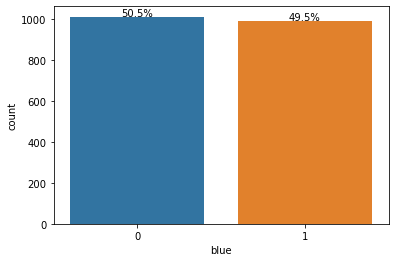

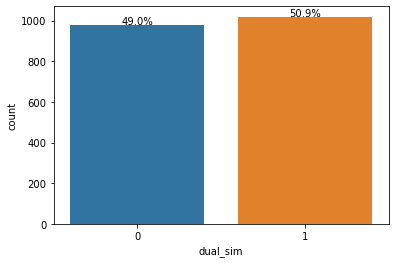

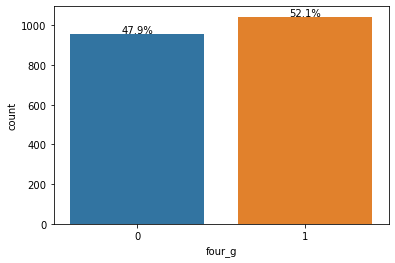

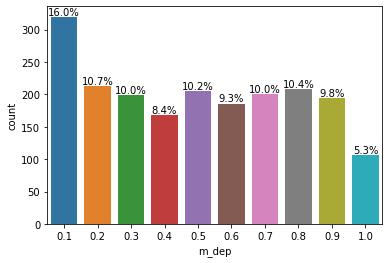

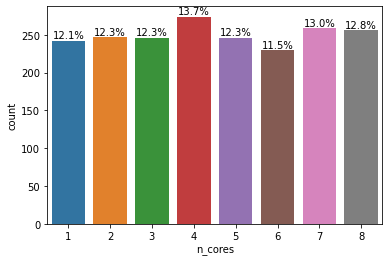

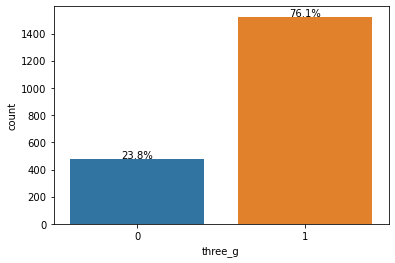

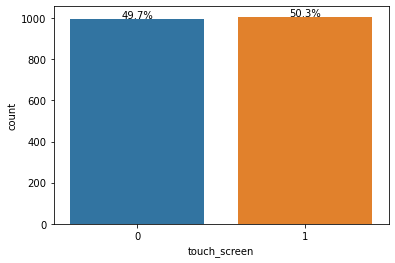

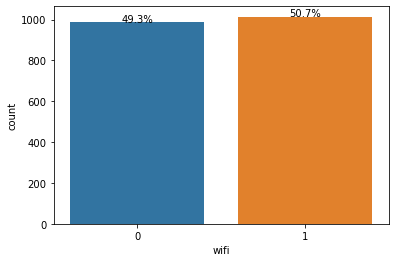

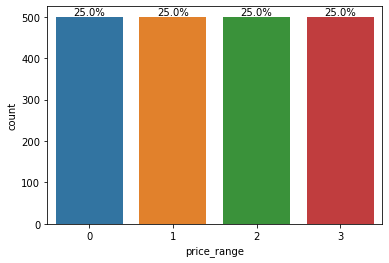

In [20]:
#Univariate analysis of categorical features
for i in cat_cols:
    ax = sns.countplot(df_train[i])
    total = float(len(df_train[i]))
    for i in ax.patches:
                  height = i.get_height()
                  ax.text(i.get_x()+i.get_width()/2.,
                          height + 3,
                          '{:.1f}%'.format((height/total)*100),
                          ha="center") 
    plt.show()
    

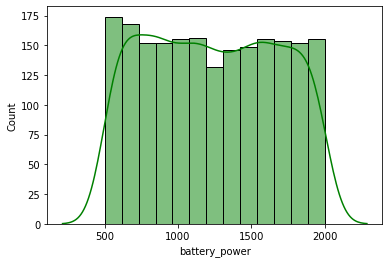

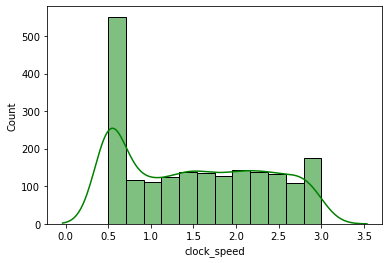

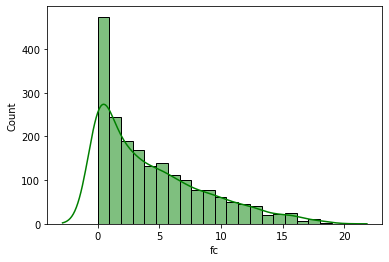

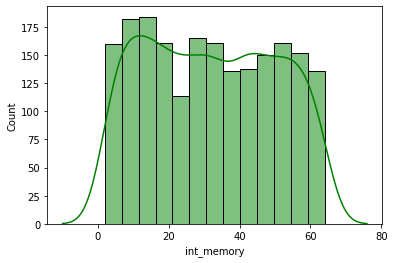

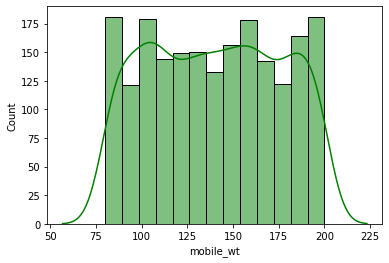

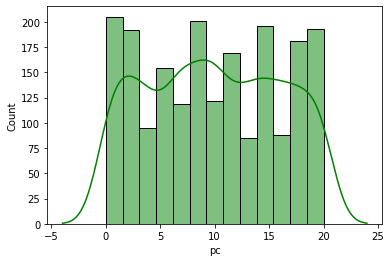

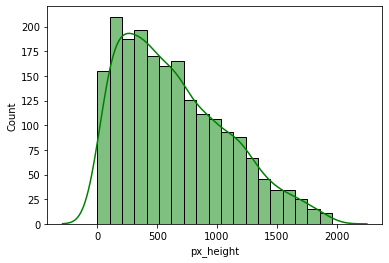

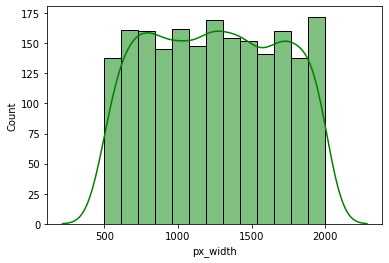

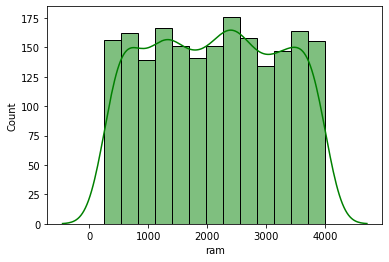

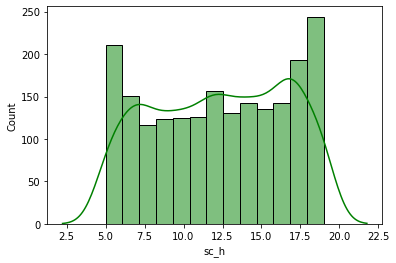

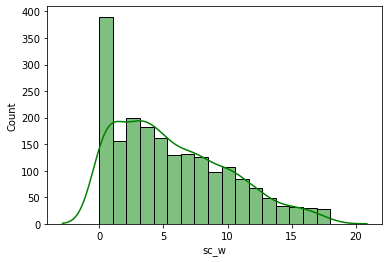

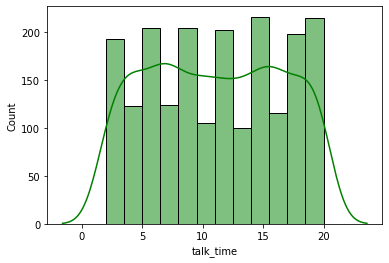

In [21]:
#Histplot
for j in num_cols:
    sns.histplot(df_train[j],kde=True,kde_kws=dict(cut=3),color='green')
    plt.show()

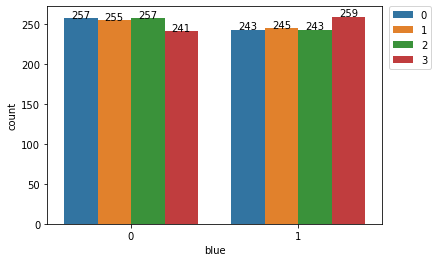

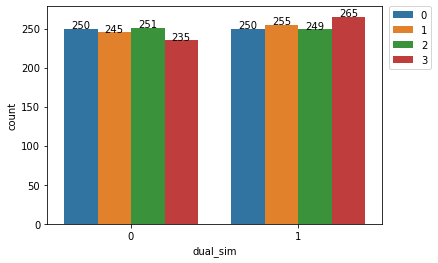

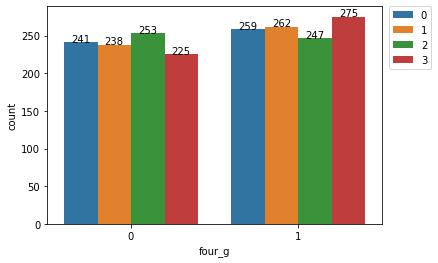

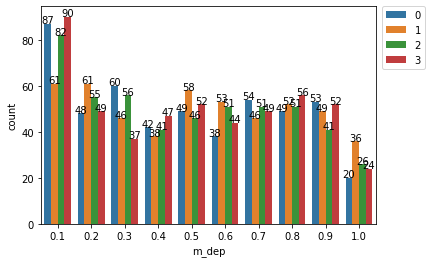

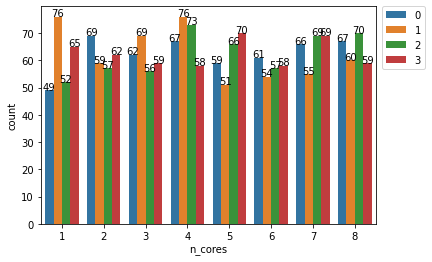

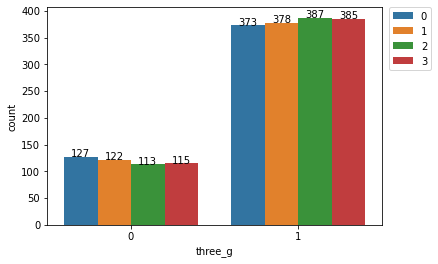

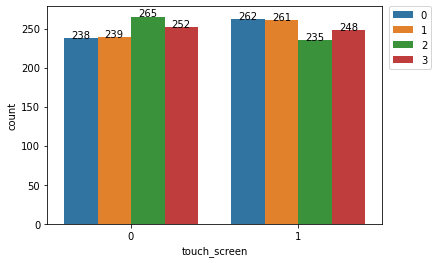

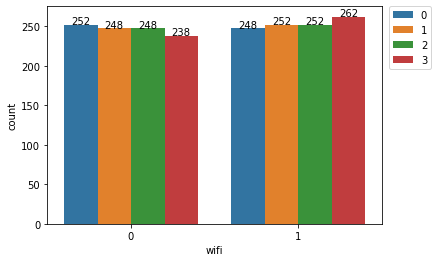

In [28]:
#Bivariate analysis
for i in cat_cols[:-1]:
    ax=sns.countplot(x=df_train[i],hue='price_range',data=df_train) 
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")
    plt.show()

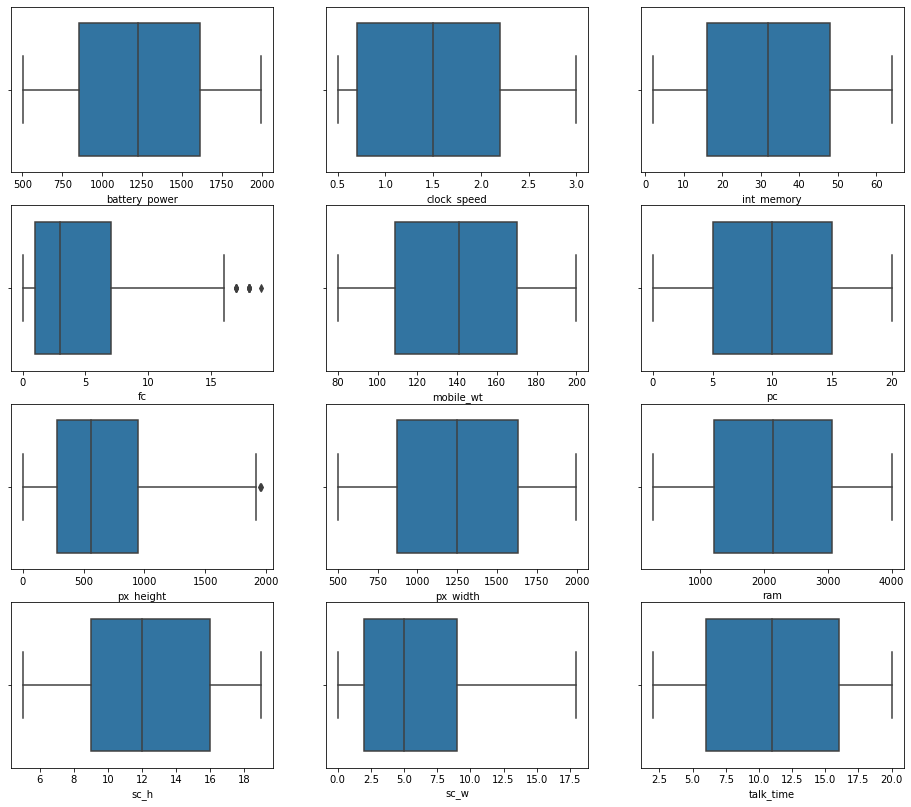

In [12]:
# Outlier detection
fig,axes = plt.subplots(4,3,figsize = (16,14))
sns.boxplot(data = df_train, x= 'battery_power',ax=axes[0,0])
sns.boxplot(data = df_train, x= 'clock_speed',ax=axes[0,1])
sns.boxplot(data = df_train, x='int_memory',ax=axes[0,2])
sns.boxplot(data = df_train, x= 'fc',ax=axes[1,0])
sns.boxplot(data = df_train, x= 'mobile_wt',ax=axes[1,1])
sns.boxplot(data = df_train, x='pc',ax=axes[1,2])
sns.boxplot(data = df_train, x='px_height',ax=axes[2,0])
sns.boxplot(data = df_train, x='px_width',ax=axes[2,1])
sns.boxplot(data = df_train, x='ram',ax=axes[2,2])
sns.boxplot(data = df_train, x='sc_h',ax=axes[3,0])
sns.boxplot(data = df_train, x='sc_w',ax=axes[3,1])
sns.boxplot(data = df_train, x='talk_time',ax=axes[3,2])
plt.show()

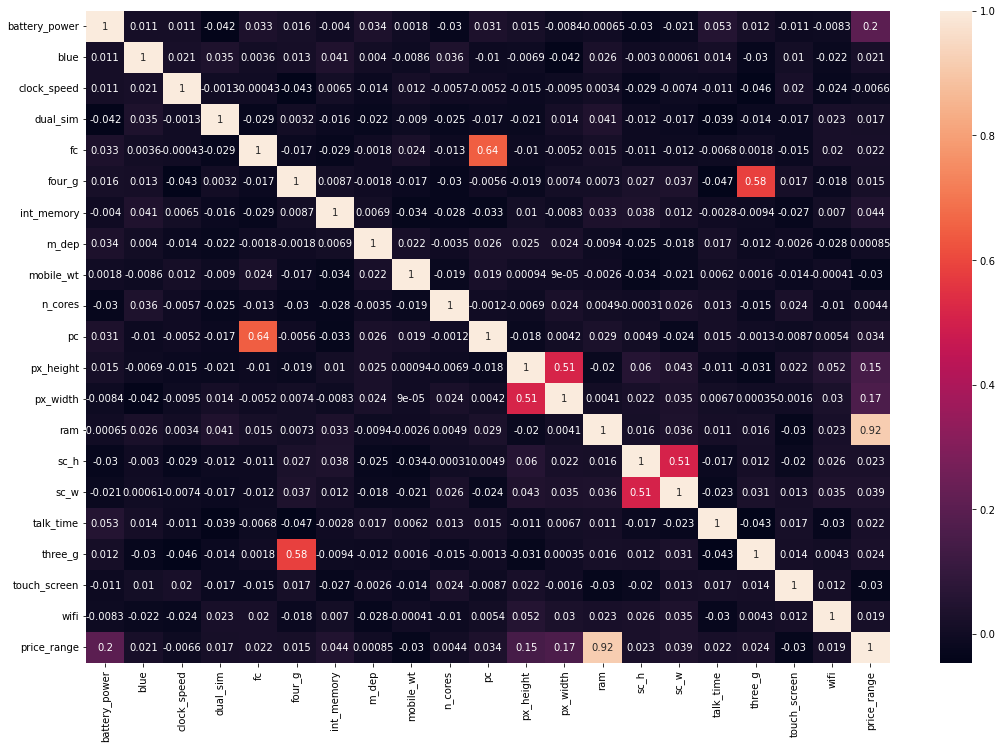

In [7]:
plt.figure(figsize=(18,12))
sns.heatmap(df_train.corr(),annot=True)
plt.show()

In [3]:
x = df_train.drop(['price_range'],axis=1)
y = df_train['price_range']

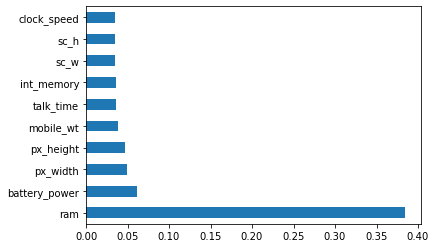

In [10]:
#Feature importance
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(x,y)
features=pd.Series(model.feature_importances_,index=x.columns)
features.nlargest(10).plot(kind='barh')
plt.show()

In [13]:
#Standard scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [14]:
# Split the dataset into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [15]:
print('x_train:',x_train.shape)
print('x_test:',x_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

x_train: (1500, 20)
x_test: (500, 20)
y_train: (1500,)
y_test: (500,)


In [15]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
log_model= LogisticRegression()
log_model.fit(x_train, y_train)
print("Training score is:{}".format(log_model.score(x_train,y_train)*100))
y_pred = log_model.predict(x_test)
#print(y_pred)
print("Accuracy is:{}".format(accuracy_score(y_test,y_pred)*100))
print("Confusion matrix is \n {}".format(confusion_matrix(y_test,y_pred)))
print("{}".format(classification_report(y_test,y_pred)))

Training score is:97.93333333333332
Accuracy is:96.2
Confusion matrix is 
 [[122   2   0   0]
 [  3 103   4   0]
 [  0   5 116   4]
 [  0   0   1 140]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       124
           1       0.94      0.94      0.94       110
           2       0.96      0.93      0.94       125
           3       0.97      0.99      0.98       141

    accuracy                           0.96       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.96      0.96      0.96       500



In [16]:
#Cross validation
cv_score=cross_val_score(log_model,x,y,cv=10)
cv_score

array([0.955, 0.98 , 0.95 , 0.96 , 0.975, 0.95 , 0.965, 0.955, 0.97 ,
       0.96 ])

In [17]:
np.mean(cv_score)*100

96.2

In [5]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
print("Training score is:{}".format(dt_model.score(x_train,y_train)*100))
y_pred = dt_model.predict(x_test)
print("Accuracy is:{}".format(accuracy_score(y_test,y_pred)*100))
print("Confusion matrix is:\n {}".format(confusion_matrix(y_test,y_pred)))
print("{}".format(classification_report(y_test,y_pred)))

Training score is:100.0
Accuracy is:82.0
Confusion matrix is:
 [[113  11   0   0]
 [  7  87  16   0]
 [  0  15  86  24]
 [  0   0  17 124]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       124
           1       0.77      0.79      0.78       110
           2       0.72      0.69      0.70       125
           3       0.84      0.88      0.86       141

    accuracy                           0.82       500
   macro avg       0.82      0.82      0.82       500
weighted avg       0.82      0.82      0.82       500



In [7]:
cv_score=cross_val_score(dt_model,x,y,cv=10)
cv_score

array([0.84 , 0.855, 0.87 , 0.805, 0.84 , 0.835, 0.845, 0.815, 0.865,
       0.795])

In [8]:
np.mean(cv_score)*100

83.65

In [18]:
#Support Vector Machine
from sklearn.svm import SVC
svm_model = SVC(kernel = 'rbf')
svm_model.fit(x_train,y_train)
print("Training score is:{}".format(svm_model.score(x_train,y_train)*100))
y_pred = svm_model.predict(x_test)
print("Accuracy is:{}".format(accuracy_score(y_test,y_pred)*100))
print("Confusion matrix is:\n {}".format(confusion_matrix(y_test,y_pred)))
print("{}".format(classification_report(y_test,y_pred)))

Training score is:98.06666666666666
Accuracy is:89.0
Confusion matrix is:
 [[118   6   0   0]
 [  6  96   8   0]
 [  0  15 106   4]
 [  0   0  16 125]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       124
           1       0.82      0.87      0.85       110
           2       0.82      0.85      0.83       125
           3       0.97      0.89      0.93       141

    accuracy                           0.89       500
   macro avg       0.89      0.89      0.89       500
weighted avg       0.89      0.89      0.89       500



In [19]:
cv_score=cross_val_score(svm_model,x,y,cv=10)
cv_score

array([0.89 , 0.9  , 0.845, 0.86 , 0.945, 0.905, 0.875, 0.845, 0.875,
       0.875])

In [20]:
np.mean(cv_score)*100

88.15000000000002

In [21]:
#Naive Bayes Classifier 
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(x_train,y_train)
print("Training score is:{}".format(nb_model.score(x_train,y_train)*100))
y_pred = nb_model.predict(x_test)
print("Accuracy is:{}".format(accuracy_score(y_test,y_pred)*100))
print("Confusion matrix is:\n {}".format(confusion_matrix(y_test,y_pred)))
print("{}".format(classification_report(y_test,y_pred)))

Training score is:81.39999999999999
Accuracy is:84.39999999999999
Confusion matrix is:
 [[117   7   0   0]
 [  6  83  21   0]
 [  0  22  92  11]
 [  0   0  11 130]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       124
           1       0.74      0.75      0.75       110
           2       0.74      0.74      0.74       125
           3       0.92      0.92      0.92       141

    accuracy                           0.84       500
   macro avg       0.84      0.84      0.84       500
weighted avg       0.84      0.84      0.84       500



In [22]:
cv_score=cross_val_score(nb_model,x,y,cv=10)
cv_score

array([0.805, 0.81 , 0.83 , 0.82 , 0.825, 0.835, 0.795, 0.815, 0.795,
       0.79 ])

In [23]:
np.mean(cv_score)*100

81.2

In [9]:
#Random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 300)
rf_model.fit(x_train,y_train)
print("Training score is:{}".format(rf_model.score(x_train,y_train)*100))
y_pred = rf_model.predict(x_test)
print("Accuracy is:{}".format(accuracy_score(y_test,y_pred)*100))
print("Confusion matrix is:\n {}".format(confusion_matrix(y_test,y_pred)))
print("{}".format(classification_report(y_test,y_pred)))


Training score is:100.0
Accuracy is:87.0
Confusion matrix is:
 [[121   3   0   0]
 [  6  88  16   0]
 [  0  18  96  11]
 [  0   0  11 130]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       124
           1       0.81      0.80      0.80       110
           2       0.78      0.77      0.77       125
           3       0.92      0.92      0.92       141

    accuracy                           0.87       500
   macro avg       0.87      0.87      0.87       500
weighted avg       0.87      0.87      0.87       500



In [10]:
cv_score=cross_val_score(rf_model,x,y,cv=10)
cv_score

array([0.895, 0.865, 0.9  , 0.885, 0.91 , 0.91 , 0.895, 0.875, 0.855,
       0.885])

In [11]:
np.mean(cv_score)*100

88.75

In [32]:
models = ['Logistic Regression','Decision Tree Classifier','Support Vector Machine','Naive Bayes Classifier','Random forest classifier']
cv_score = ['96.2','83.65','88.15','81.2','88.75']
for i in models:
    for j in cv_score:
        df1 = pd.DataFrame({'Models':models,'cv_score':cv_score})
print(df1)

                     Models cv_score
0       Logistic Regression     96.2
1  Decision Tree Classifier    83.65
2    Support Vector Machine    88.15
3    Naive Bayes Classifier     81.2
4  Random forest classifier    88.75


In [14]:
df_test.isna().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [33]:
#prediction on test data
test = df_test.drop(['id'],axis=1)
test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [34]:
model = LogisticRegression()
model.fit(x,y)
pred = model.predict(test)
pred

array([2, 3, 1, 3, 2, 2, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 1, 1, 2, 1, 0, 3,
       1, 2, 3, 0, 2, 0, 3, 1, 1, 0, 3, 0, 0, 1, 3, 2, 3, 3, 0, 2, 0, 0,
       0, 1, 1, 3, 1, 2, 3, 1, 2, 0, 3, 0, 3, 1, 1, 3, 3, 3, 1, 1, 0, 2,
       1, 3, 1, 2, 1, 2, 2, 2, 2, 0, 3, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 1, 1, 2, 2, 0, 2, 3, 0, 2, 1, 3, 3, 0, 0, 2, 1, 1, 1, 1, 3, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 3, 0, 0, 3, 3, 1, 1, 0, 3, 3, 2, 1, 0, 2,
       1, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 2, 3, 3, 3, 3, 1, 3, 2, 3, 1, 0,
       2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 1, 1, 0, 2,
       1, 0, 2, 2, 0, 0, 1, 1, 2, 2, 1, 1, 0, 0, 0, 0, 0, 3, 1, 0, 2, 3,
       3, 3, 1, 3, 2, 3, 2, 1, 2, 0, 1, 0, 2, 2, 1, 2, 2, 3, 1, 3, 0, 3,
       2, 2, 2, 1, 0, 1, 0, 2, 0, 1, 0, 2, 1, 0, 3, 0, 3, 0, 3, 1, 1, 0,
       0, 3, 0, 3, 2, 3, 1, 1, 3, 0, 0, 2, 2, 3, 1, 3, 1, 1, 3, 3, 2, 3,
       3, 3, 3, 2, 0, 2, 1, 2, 2, 1, 3, 2, 0, 3, 0, 2, 1, 0, 0, 3, 2, 2,
       3, 2, 0, 3, 3, 1, 2, 1, 2, 1, 1, 0, 2, 3, 1,

In [39]:
model.predict([test.iloc[6]])

array([3], dtype=int64)

In [7]:
#Ranking
newdf = df_train.copy()
newdf.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [8]:
newdf['price_rank'] = newdf['price_range'].rank(ascending=False)
newdf.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,price_rank
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1,1250.5
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2,750.5
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2,750.5
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2,750.5
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1,1250.5


In [10]:
newdf['rank_battery_power'] = newdf['battery_power'].rank(ascending=False,method='dense')
newdf['rank_blue'] = newdf['blue'].rank(ascending=False,method='dense')
newdf['rank_clock_speed'] =newdf['clock_speed'].rank(ascending=False,method='dense')
newdf['rank_dual_sim'] = newdf['dual_sim'].rank(ascending=False,method='dense')
newdf['rank_fc'] =newdf['fc'].rank(ascending=False,method='dense')
newdf['rank_four_g'] = newdf['four_g'].rank(ascending=False,method='dense')
newdf['rank_int_memory'] =newdf['int_memory'].rank(ascending=False,method='dense')
newdf['rank_m_dep'] = newdf['m_dep'].rank(ascending=False,method='dense')
newdf['rank_mobile_wt'] = newdf['mobile_wt'].rank(ascending=False,method='dense')
newdf['rank_n_cores'] = newdf['n_cores'].rank(ascending=False,method='dense')
newdf['rank_pc'] = newdf['pc'].rank(ascending=False,method='dense')
newdf['rank_px_height'] = newdf['px_height'].rank(ascending=False,method='dense')
newdf['rank_px_width'] = newdf['px_width'].rank(ascending=False,method='dense')
newdf['rank_ram'] = newdf['ram'].rank(ascending=False,method='dense')
newdf['rank_sc_h'] = newdf['sc_h'].rank(ascending=False,method='dense')
newdf['rank_sc_w'] = newdf['sc_w'].rank(ascending=False,method='dense')
newdf['rank_talk_time'] = newdf['talk_time'].rank(ascending=False,method='dense')
newdf['rank_three_g'] =newdf['three_g'].rank(ascending=False,method='dense')
newdf['rank_touch_screen'] = newdf['touch_screen'].rank(ascending=False,method='dense')
newdf['rank_wifi'] = newdf['wifi'].rank(ascending=False,method='dense')
newdf

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,price_rank,rank_blue,rank_battery_power,rank_clock_speed,rank_dual_sim,rank_fc,rank_four_g,rank_int_memory,rank_m_dep,rank_mobile_wt,rank_n_cores,rank_pc,rank_px_height,rank_px_width,rank_ram,rank_sc_h,rank_sc_w,rank_talk_time,rank_three_g,rank_touch_screen,rank_wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1,1250.5,2.0,839.0,9.0,2.0,19.0,2.0,58.0,5.0,13.0,7.0,19.0,1119.0,923.0,599.0,11.0,12.0,2.0,2.0,2.0,1.0
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2,750.5,1.0,712.0,26.0,1.0,20.0,1.0,12.0,4.0,65.0,6.0,15.0,399.0,10.0,564.0,3.0,16.0,14.0,1.0,1.0,2.0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2,750.5,1.0,1046.0,26.0,1.0,18.0,1.0,24.0,2.0,56.0,4.0,15.0,175.0,208.0,578.0,9.0,17.0,12.0,1.0,1.0,2.0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2,750.5,1.0,1006.0,6.0,2.0,20.0,2.0,55.0,3.0,70.0,3.0,12.0,202.0,155.0,507.0,4.0,11.0,10.0,1.0,2.0,2.0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1,1250.5,1.0,140.0,19.0,2.0,7.0,1.0,21.0,5.0,60.0,7.0,7.0,209.0,592.0,1063.0,12.0,17.0,6.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0,1750.5,1.0,878.0,26.0,1.0,20.0,1.0,63.0,3.0,95.0,3.0,7.0,198.0,87.0,1382.0,7.0,15.0,2.0,1.0,1.0,2.0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2,750.5,1.0,30.0,5.0,1.0,20.0,2.0,26.0,9.0,14.0,5.0,18.0,392.0,29.0,830.0,9.0,9.0,5.0,1.0,1.0,1.0
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3,250.5,2.0,67.0,22.0,1.0,19.0,1.0,29.0,4.0,93.0,1.0,18.0,421.0,275.0,404.0,11.0,18.0,16.0,1.0,1.0,2.0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0,1750.5,2.0,362.0,22.0,2.0,16.0,1.0,19.0,10.0,56.0,4.0,16.0,854.0,989.0,1296.0,2.0,9.0,2.0,1.0,1.0,1.0


In [11]:
#Ranking within groups
r = df_train.copy()
r['price_rank'] = r['price_range'].rank(ascending=False)
r.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,price_rank
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1,1250.5
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2,750.5
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2,750.5
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2,750.5
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1,1250.5


In [12]:
r['rank_battery_power'] = r.groupby('battery_power')['price_rank'].rank(ascending=False)
r['rank_blue'] = r.groupby('blue')['price_rank'].rank(ascending=False)
r['rank_clock_speed'] = r.groupby('clock_speed')['price_rank'].rank(ascending=False)
r['rank_dual_sim'] = r.groupby('dual_sim')['price_rank'].rank(ascending=False)
r['rank_fc'] = r.groupby('fc')['price_rank'].rank(ascending=False)
r['rank_four_g'] = r.groupby('four_g')['price_rank'].rank(ascending=False)
r['rank_int_memory'] = r.groupby('int_memory')['price_rank'].rank(ascending=False)
r['rank_m_dep'] = r.groupby('m_dep')['price_rank'].rank(ascending=False)
r['rank_mobile_wt'] = r.groupby('mobile_wt')['price_rank'].rank(ascending=False)
r['rank_n_cores'] = r.groupby('n_cores')['price_rank'].rank(ascending=False)
r['rank_pc'] = r.groupby('pc')['price_rank'].rank(ascending=False)
r['rank_px_height'] = r.groupby('px_height')['price_rank'].rank(ascending=False)
r['rank_px_width'] = r.groupby('px_width')['price_rank'].rank(ascending=False)
r['rank_ram'] = r.groupby('ram')['price_rank'].rank(ascending=False)
r['rank_sc_h'] = r.groupby('sc_h')['price_rank'].rank(ascending=False)
r['rank_sc_w'] = r.groupby('sc_w')['price_rank'].rank(ascending=False)
r['rank_talk_time'] = r.groupby('talk_time')['price_rank'].rank(ascending=False)
r['rank_three_g'] = r.groupby('three_g')['price_rank'].rank(ascending=False)
r['rank_touch_screen'] = r.groupby('touch_screen')['price_rank'].rank(ascending=False)
r['rank_wifi'] = r.groupby('wifi')['price_rank'].rank(ascending=False)
r

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,price_rank,rank_battery_power,rank_blue,rank_clock_speed,rank_dual_sim,rank_fc,rank_four_g,rank_int_memory,rank_m_dep,rank_mobile_wt,rank_n_cores,rank_pc,rank_px_height,rank_px_width,rank_ram,rank_sc_h,rank_sc_w,rank_talk_time,rank_three_g,rank_touch_screen,rank_wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1,1250.5,1.5,385.0,18.5,373.0,99.5,360.5,16.5,65.0,4.0,99.0,37.0,2.0,2.0,1.0,45.0,53.5,43.0,188.5,358.0,374.5
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2,750.5,2.0,610.0,262.5,630.0,306.0,645.0,17.5,126.0,9.5,159.5,53.0,1.5,3.5,1.0,111.0,128.0,75.0,945.0,641.0,624.5
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2,750.5,1.5,610.0,262.5,630.0,117.5,645.0,25.5,123.0,15.0,143.5,53.0,1.0,1.0,1.0,85.0,95.0,65.5,945.0,641.0,624.5
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2,750.5,3.0,610.0,47.0,621.0,306.0,606.0,22.5,127.0,14.5,144.0,71.0,1.0,1.5,1.0,92.0,77.0,61.5,945.0,610.0,624.5
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1,1250.5,1.0,366.0,20.0,373.0,18.0,390.5,10.0,65.0,5.0,99.0,42.0,1.0,1.0,1.0,43.5,54.0,42.5,562.5,393.0,376.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0,1750.5,1.0,122.0,55.0,125.5,61.0,130.0,6.0,25.0,1.5,31.0,14.5,1.0,1.0,1.0,13.0,23.5,14.0,187.0,131.5,126.5
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2,750.5,1.0,610.0,35.0,630.0,306.0,606.0,19.0,137.0,13.5,180.0,60.0,1.0,2.0,1.0,85.0,70.0,71.5,945.0,641.0,626.5
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3,250.5,1.5,890.0,51.5,887.0,210.5,906.0,24.0,176.0,8.0,227.0,83.0,1.5,1.0,1.0,109.5,178.0,81.0,1331.0,882.5,867.5
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0,1750.5,1.0,129.0,9.5,125.5,18.0,130.0,5.0,44.0,3.0,30.0,7.0,1.0,2.0,1.5,13.0,18.0,14.0,187.0,131.5,124.5
